# PyTorch를 이용하여 남이 만든 모델을 불러오고 이용해보기.

## 학습 결과를 공유하고 저장할 필요가 있다.

# model.save()
- 학습의 결과를 저장하기 위한 함수이다.
- 모델 형태(architecture)와 파라메터를 저장할 수 있다.
- 모델 학습 중간 과정의 저장을 통해 최선의 결과모델을 선택한다.
- 만들어진 모델을 외부 연구자와 공유하여 학습 재연성을 향상시킨다.

In [ ]:
# Example

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict(): # state_dict : 모델의 파라메터를 표시
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

torch.save(model.state_dict(), # 모델의 파라메터를 저장
           os.path.join(MODEL_PATH, 'model.pt'))


new_model = TheModelClass()  # 같은 모델의 형태에서 파라메터만 load
new_model.load_state_dict(torch.load(os.path.join(MODEL_PATH    , 'model.pt')))

# 모델의 architecture와 함께 저장
torch.save(model, os.path.join(MODEL_PATH, 'model.pt'))

# 모델의 architecture와 함께 load
model = torch.load(os.path.join(MODEL_PATH, 'model.pt'))



# checkpoints
- 학습의 중간 결과를 저장하여 최선의 결과를 선택한다
- earlystopping 기법 사용시 이전 학습의 결과물을 저장한다.
- loss와 metric 값을 지속적으로 확인하고 저장한다.
- 일반적으로 epoch, loss, metric을 함께 저장하여 확인한다.
- colab에서 지속적인 학습을 위해 필요하다

In [ ]:
# Example

torch.save({ # 모델의 정보를 epoch과 함께 저장
            'epoch': e,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': epoch_loss,
            },
f"saved/checkpoint_model_{e}_{epoch_loss/len(dataloader)}_{epoch_acc/len(dataloader)}.pt")

checkpoint = torch.load(PATH)
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

# Transfer learning
- 다른 데이터셋으로 만든 모델을 현재 데이터에 적용한다. -> 대용량 데이터로 학습된 모델을 소규모 데이터에 적용
- 일반적으로 대용량 데이터셋으로 만들어진 모델의 성능 UP
- 현재의 딥러닝에서는 가장 일반적인 학습 기법이다.
- backbone architecture가 잘 학습된 모델에서 일부분만 변경하여 학습을 수행한다.

#### TorchVision은 다양한 기본 모델을 제공한다.
#### NLP는 HuggigFace가 표준 모델.

- pretrained model을 활용할 때 모델의 일부분을 frozen 시킨다.
ex)
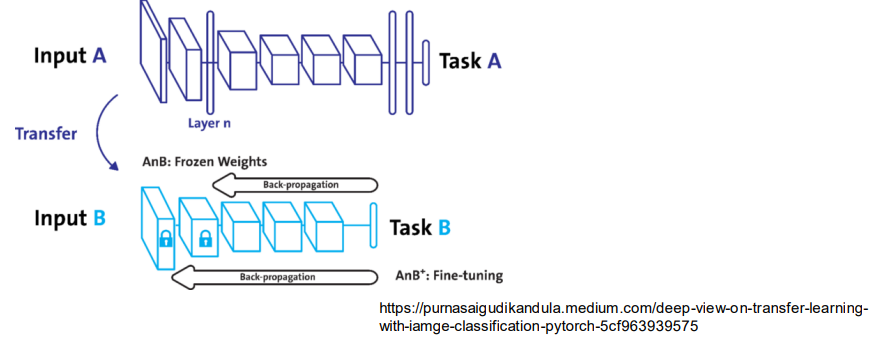

In [ ]:
# Example

# vgg16 모델을 vgg에 할당하기
vgg = models.vgg16(pretrained = True).to(device)


class MyNewNet(nn.Module):
    def __init__(self):
        super(MyNewNet, self).__init__()
        self.vgg19 = models.vgg19(pretrained=True)
        self.linear_layers = nn.Linear(1000, 1) # 모델에 마지막 Linear Layer 추가

    # Defining the forward pass
    def forward(self, x):
        x = self.vgg19(x)
        return self.linear_layers(x)


    # 마지막 레이어를 제외하고 frozen 시켜준다.
    for param in my_model.parameters():
        param.requires_grad = False
    
    for param in my_model.linear_layers.parameters():
        param.requires_grad = True